<a href="https://colab.research.google.com/github/rop2000/Stock-Short-Data-Analysis-Script/blob/main/Short_Data_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Short Data Notebook

###Data from 
> [Nasdaq Short Data](https://www.nasdaqtrader.com/Trader.aspx?id=shortsale)

> [FINRA Short Data](http://regsho.finra.org/regsho-Index.html)


In [55]:
#Set globals for stonks

STOCK = 'DASH' # This is the only one that shuld be modified
UNFORMATTED_DATES = []
DATES = []
BX_SHORT_VALS = []
PSX_SHORT_VALS = []
FINRA_SHORT_VALS = []

In [56]:
%cd '/content'
!mkdir 'BX Data'
%cd 'BX Data'

/content
mkdir: cannot create directory ‘BX Data’: File exists
/content/BX Data


In [57]:
import ftplib
import os
import datetime


FTP_HOST = "ftp.nasdaqtrader.com"

FTP_USER = "Anonymous"

FTP_PASS = "guest"

In [58]:
# some utility functions
def get_size_format(n, suffix="B"):
    # converts bytes to scaled format (e.g KB, MB, etc.)
    for unit in ["", "K", "M", "G", "T", "P"]:
        if n < 1024:
            return f"{n:.2f}{unit}{suffix}"
        n /= 1024

def get_datetime_format(date_time):
    # convert to datetime object
    date_time = datetime.strptime(date_time, "%Y%m%d%H%M%S")
    # convert to human readable date time string
    return date_time.strftime("%Y/%m/%d %H:%M:%S")

In [59]:
# connect to the FTP server
ftp = ftplib.FTP(FTP_HOST, FTP_USER, FTP_PASS)
# force UTF-8 encoding
ftp.encoding = "utf-8"

In [60]:
# print the welcome message - 220 means client is ready and connected
print(ftp.getwelcome())

220 Microsoft FTP Service


In [61]:
ftp.cwd("files/shortsaledata/daily")

'250 CWD command successful.'

In [62]:
def parse_dir_line(line):
        words = line.split()
        filename = words[8]
        size = int(words[4])
        t = words[7].split(':')
        ts = words[5] + '-' + words[6] + '-' + datetime.datetime.now().strftime('%Y') + ' ' + t[0] + ':' + t[1]
        timestamp = datetime.datetime.strptime(ts, '%b-%d-%Y %H:%M')

In [63]:
# LIST a directory
print("*"*50, "LIST", "*"*50)
dir_list = []
ftp.dir(dir_list.append)
print(dir_list)
for line in dir_list:
   print(line[29:].strip().split(' '))

************************************************** LIST **************************************************
['02-12-21  04:31PM       <DIR>          bx', '09-06-12  12:18PM       <DIR>          nasdaq', '02-12-21  04:30PM       <DIR>          psx']
['bx']
['nasdaq']
['psx']


In [64]:
ftp.cwd("bx")
os.chdir('/content/BX Data')
!pwd

/content/BX Data


In [65]:
# # LIST a directory
# print("*"*50, "LIST", "*"*50)
# bx_file_list = []
# final_files = []
# ftp.dir(bx_file_list.append)
# print(bx_file_list)
# for line in bx_file_list:
#    final_files.append(line[29:].strip().split(' ')[1])
# print(final_files)

In [66]:
# https://stackoverflow.com/questions/11573817/how-to-download-a-file-via-ftp-with-python-ftplib
bx_filenames = ftp.nlst()
bx_filenames = bx_filenames[-100:] #Most recent 100 days (past 100 days)
print(bx_filenames)


['NQBXshvol20200922.txt', 'NQBXshvol20200923.txt', 'NQBXshvol20200924.txt', 'NQBXshvol20200925.txt', 'NQBXshvol20200928.txt', 'NQBXshvol20200929.txt', 'NQBXshvol20200930.txt', 'NQBXshvol20201001.txt', 'NQBXshvol20201002.txt', 'NQBXshvol20201005.txt', 'NQBXshvol20201006.txt', 'NQBXshvol20201007.txt', 'NQBXshvol20201008.txt', 'NQBXshvol20201009.txt', 'NQBXshvol20201012.txt', 'NQBXshvol20201013.txt', 'NQBXshvol20201014.txt', 'NQBXshvol20201015.txt', 'NQBXshvol20201016.txt', 'NQBXshvol20201019.txt', 'NQBXshvol20201020.txt', 'NQBXshvol20201021.txt', 'NQBXshvol20201022.txt', 'NQBXshvol20201023.txt', 'NQBXshvol20201026.txt', 'NQBXshvol20201027.txt', 'NQBXshvol20201028.txt', 'NQBXshvol20201029.txt', 'NQBXshvol20201030.txt', 'NQBXshvol20201102.txt', 'NQBXshvol20201103.txt', 'NQBXshvol20201104.txt', 'NQBXshvol20201105.txt', 'NQBXshvol20201106.txt', 'NQBXshvol20201109.txt', 'NQBXshvol20201110.txt', 'NQBXshvol20201111.txt', 'NQBXshvol20201112.txt', 'NQBXshvol20201113.txt', 'NQBXshvol20201116.txt',

In [67]:
for bxfile in bx_filenames:
  with open(bxfile, 'wb') as file:
    ftp.retrbinary('RETR %s' % bxfile, file.write)
    file.close()

In [68]:
# https://stackoverflow.com/questions/18262293/how-to-open-every-file-in-a-folder

In [69]:
# %cd /content
# %rm -rf 'BX Data'

In [70]:
import pandas as pd
from string import digits



################# EXTREMELY IMPORTANT CANCER ########################3
############## os.listdir is stupid and doesnt return files in the right order##############
############## YOU HAVE TO USE SORTED function around it for correct order ##################
# print(sorted(os.listdir(os.getcwd())))

#get current working directory
dateString = '';
allFiles = sorted(os.listdir(os.getcwd()))
print(len(allFiles))
for filename in allFiles:
   print(dateString)
   with open(os.path.join(os.getcwd(), filename), 'r') as file:
     lines = file.readlines()
     file.close() #free memory
     for line in lines:
       line = line.split('|')
       
       if len(line) > 1:
          if line[1] == STOCK and line[0] is not 'DATE':
            BX_SHORT_VALS.append(int(line[2]))

            dateString = ''.join(c for c in filename if c in digits)
            
            UNFORMATTED_DATES.append(dateString)

            if dateString[4] != 0:
              month = int(dateString[4:6])
            else:
              month = int(dateString[5])
            
            if dateString[6] != 0:
              day = int(dateString[-2:])
            else:
              day = int(dateString[7])

            DATES.append(datetime.date(int(dateString[:4]), month, day))


print(BX_SHORT_VALS)

100
























































20201209
20201210
20201211
20201214
20201215
20201216
20201217
20201218
20201221
20201222
20201223
20201224
20201228
20201229
20201230
20201231
20210104
20210105
20210106
20210107
20210108
20210111
20210112
20210113
20210114
20210115
20210119
20210120
20210121
20210122
20210125
20210126
20210127
20210128
20210129
20210201
20210202
20210203
20210204
20210205
20210208
20210209
20210210
20210211
[112998, 17277, 14682, 119104, 76424, 21657, 34207, 36248, 12238, 22691, 8841, 3600, 24589, 52106, 14666, 29319, 18068, 4522, 15300, 15348, 26106, 10000, 35507, 24592, 19303, 7209, 14595, 7744, 7762, 4946, 12876, 8985, 25253, 10154, 3150, 4000, 3631, 2500, 4400, 7400, 5805, 7006, 15362, 11102, 4700]


In [71]:
  print(UNFORMATTED_DATES)
  print(DATES)
  print(BX_SHORT_VALS)

['20201209', '20201210', '20201211', '20201214', '20201215', '20201216', '20201217', '20201218', '20201221', '20201222', '20201223', '20201224', '20201228', '20201229', '20201230', '20201231', '20210104', '20210105', '20210106', '20210107', '20210108', '20210111', '20210112', '20210113', '20210114', '20210115', '20210119', '20210120', '20210121', '20210122', '20210125', '20210126', '20210127', '20210128', '20210129', '20210201', '20210202', '20210203', '20210204', '20210205', '20210208', '20210209', '20210210', '20210211', '20210212']
[datetime.date(2020, 12, 9), datetime.date(2020, 12, 10), datetime.date(2020, 12, 11), datetime.date(2020, 12, 14), datetime.date(2020, 12, 15), datetime.date(2020, 12, 16), datetime.date(2020, 12, 17), datetime.date(2020, 12, 18), datetime.date(2020, 12, 21), datetime.date(2020, 12, 22), datetime.date(2020, 12, 23), datetime.date(2020, 12, 24), datetime.date(2020, 12, 28), datetime.date(2020, 12, 29), datetime.date(2020, 12, 30), datetime.date(2020, 12, 

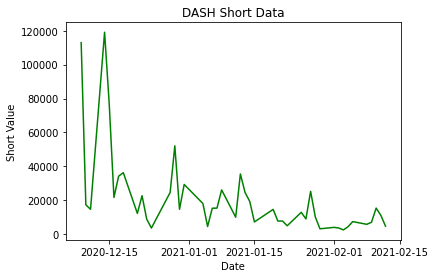

In [74]:
import matplotlib.pyplot as plt

plt.plot(DATES, BX_SHORT_VALS, color='g')
# plt.plot(DATES, pop_india, color='orange')
plt.xlabel('Date')
plt.ylabel('Short Value')
plt.title('DASH Short Data')
plt.show()